<a href="https://colab.research.google.com/github/HarishVashisht/Face_mask_detection/blob/main/Gan_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[10].shape

(28, 28)

In [ ]:
x_train[10].flatten().shape

(784,)

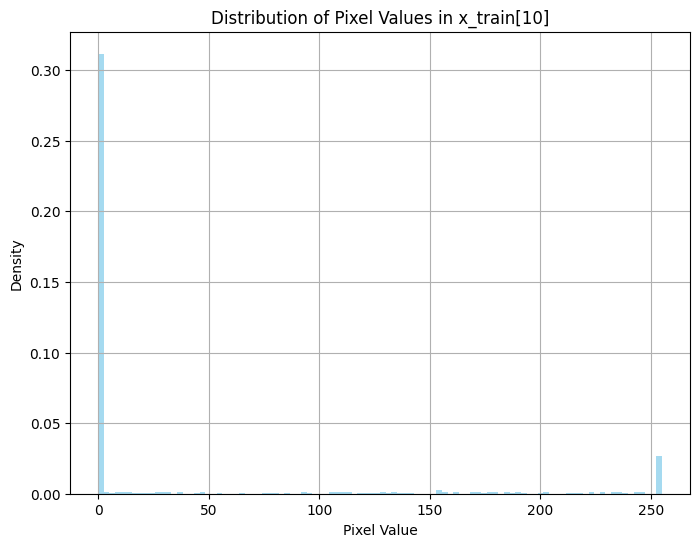

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of pixel values
plt.figure(figsize=(8, 6))
plt.hist(x_train[17].flatten(), bins=100, range=(0, 255), density=True, color='skyblue', alpha=0.75)
plt.title('Distribution of Pixel Values in x_train[10]')
plt.xlabel('Pixel Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Reshape the input images to 28x28x1 (height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train[10].shape

(28, 28, 1)

In [ ]:
# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_train[10].shape

(28, 28, 1)

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/3
469/469 [==============================] - 8s 7ms/step - loss: 0.2086 - accuracy: 0.9404 - val_loss: 0.0803 - val_accuracy: 0.9753
Epoch 2/3
469/469 [==============================] - 2s 5ms/step - loss: 0.0616 - accuracy: 0.9820 - val_loss: 0.0658 - val_accuracy: 0.9787
Epoch 3/3
469/469 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9889 - val_loss: 0.0558 - val_accuracy: 0.9813


In [ ]:
history.history['accuracy']

[0.9403833150863647, 0.9819833040237427, 0.9889166951179504]

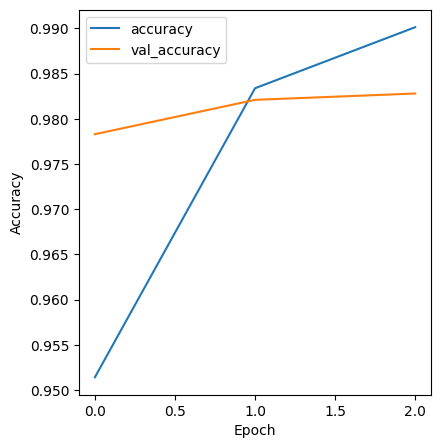

In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

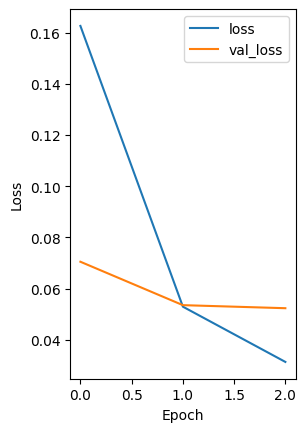

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0524 - accuracy: 0.9828
Test loss: 0.0524
Test accuracy: 0.9828


In [ ]:
# Select a random test image
index = np.random.randint(0, len(x_test))
index

3811

In [ ]:

test_image = x_test[index]
true_label = np.argmax(y_test[index])

In [ ]:
test_image.shape

(28, 28, 1)

In [ ]:
true_label

2

In [ ]:
# Make a prediction
prediction = model.predict(np.expand_dims(test_image, axis=0))
prediction

1/1 [==============================] - 0s 232ms/step


array([[5.9488905e-03, 1.8697603e-05, 8.5012865e-01, 1.3157736e-01,
        1.5399808e-05, 1.9623186e-04, 1.3850320e-07, 9.0029594e-03,
        2.4646979e-03, 6.4704323e-04]], dtype=float32)

In [ ]:
predicted_label = np.argmax(prediction)
predicted_label

2

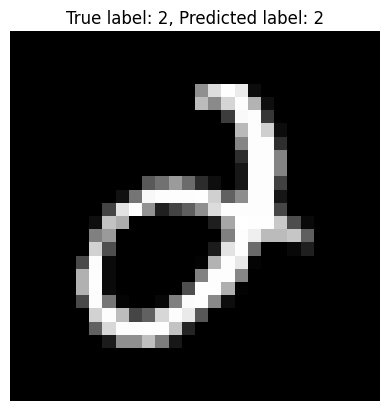

In [ ]:
# Display the test image and its true/predicted labels
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f'True label: {true_label}, Predicted label: {predicted_label}')
plt.axis('off')
plt.show()

# Autoencoders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
x_train.shape

(60000, 784)

In [ ]:


# Define the autoencoder model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(784, activation='sigmoid')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 222

Epoch 1/10
235/235 [==============================] - 4s 6ms/step - loss: 0.2414 - val_loss: 0.1614
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1467 - val_loss: 0.1331
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1276 - val_loss: 0.1214
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1194 - val_loss: 0.1154
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1143 - val_loss: 0.1109
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1102 - val_loss: 0.1069
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1066 - val_loss: 0.1044
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1040 - val_loss: 0.1017
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1021 - val_loss: 0.0999
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1004 - val_loss: 0.0986

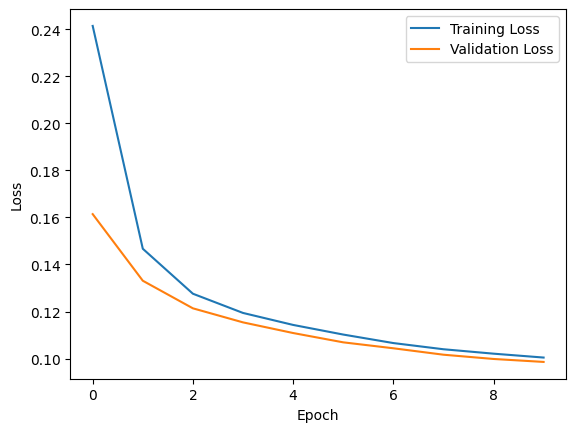

In [ ]:
# Train the autoencoder
history = model.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Select a few random test images
num_images = 5
random_test_images = np.random.randint(0, len(x_test), size=num_images)
random_test_images

array([8515, 4739, 6335, 1272, 4874])

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
reconstructed_images.shape

(10000, 784)

In [ ]:


# Reconstruct the test images using the trained autoencoder
reconstructed_images = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
reconstructed_images[0].shape

(784,)

In [ ]:
x_test[8515].shape

(784,)

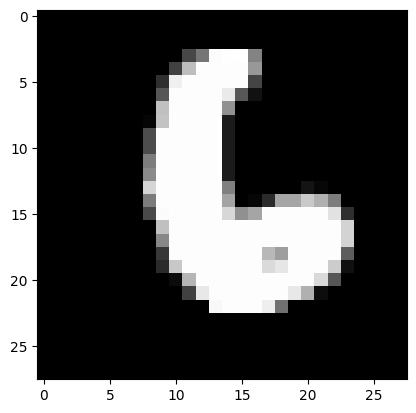

In [ ]:
plt.imshow(x_test[8515].reshape(28, 28), cmap='gray')

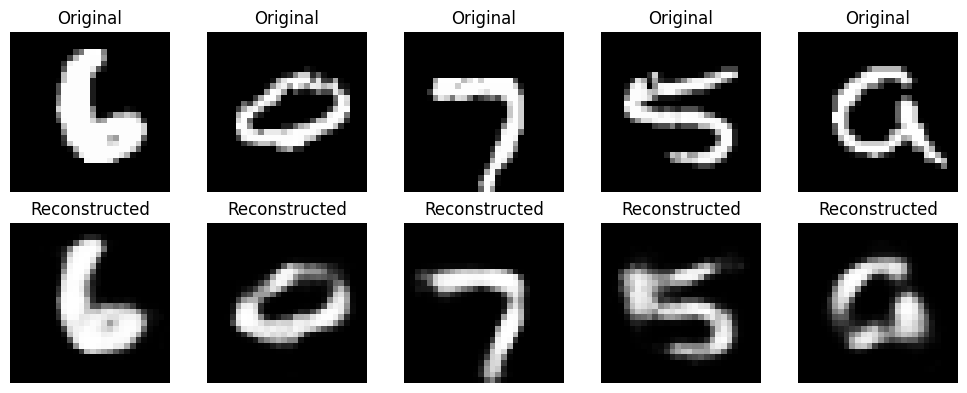

In [ ]:
# Plot the original and reconstructed images
plt.figure(figsize=(10, 4))
for i, image_idx in enumerate(random_test_images):
    # Plot original image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Plot reconstructed image
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(reconstructed_images[image_idx].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()

# GANs

In [ ]:
import tensorflow as tf

# Define a variable
x = tf.Variable(9.0)

# Record operations for automatic differentiation
with tf.GradientTape() as tape:
    # Define a function using the variable
    y = x * x

# Compute the gradient of the function with respect to the variable
gradient = tape.gradient(y, x)

print(gradient.numpy())

18.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load MNIST data
(train_images, _), (_, _) = mnist.load_data()

# Preprocess data
train_images = (train_images - 127.5) / 127.5  # Normalize between -1 and 1
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension


In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
# Define generator model
def build_generator():
    model = models.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

# Define discriminator model
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
# Instantiate generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

In [ ]:
# Define loss functions
cross_entropy = losses.BinaryCrossentropy(from_logits=True)

# Define generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Define discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# Define optimizers
generator_optimizer = optimizers.Adam(1e-4)
discriminator_optimizer = optimizers.Adam(1e-4)

In [ ]:
# Define training loop
@tf.function
def train_step(images):
    noise = tf.random.normal([tf.shape(images)[0], 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return disc_loss, gen_loss

In [ ]:
# Define function to generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [ ]:
train_images.shape[0] // 256

234

In [ ]:
batch_size = 256

In [ ]:
 batch = train_images[1 * batch_size: (i + 1) * batch_size]
 batch.shape

(1024, 28, 28, 1)

In [ ]:
234 * 1024

Epoch 0/100, Discriminator Loss: 1.1813387870788574, Generator Loss: 0.8380158543586731


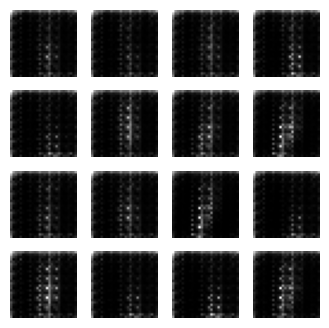

Epoch 3/100, Discriminator Loss: 1.071692943572998, Generator Loss: 0.9977699518203735


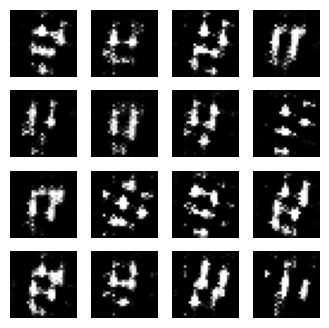

Epoch 6/100, Discriminator Loss: 1.2363529205322266, Generator Loss: 0.8349005579948425


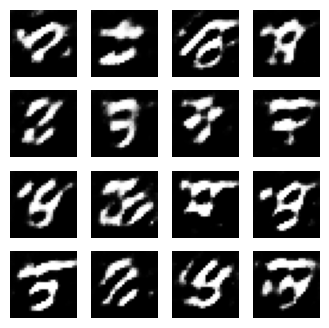

Epoch 9/100, Discriminator Loss: 1.3340612649917603, Generator Loss: 0.8875341415405273


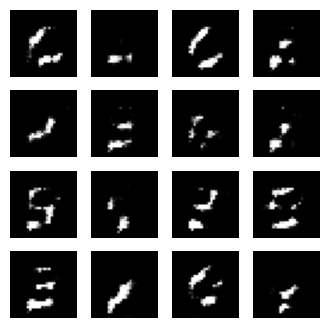

Epoch 12/100, Discriminator Loss: 1.2467231750488281, Generator Loss: 0.991432249546051


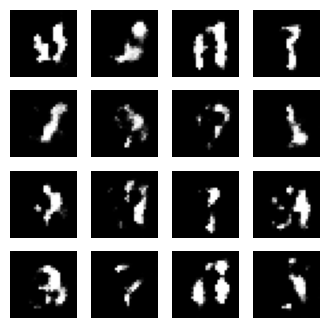

Epoch 15/100, Discriminator Loss: 1.4349887371063232, Generator Loss: 0.9714140892028809


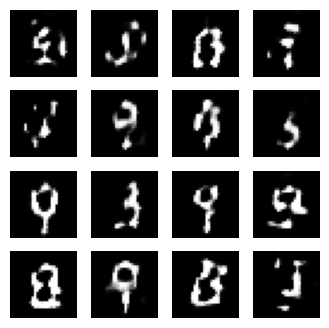

Epoch 18/100, Discriminator Loss: 1.0862215757369995, Generator Loss: 1.2002074718475342


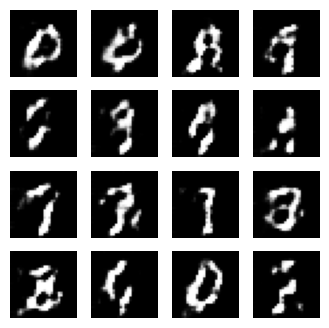

Epoch 21/100, Discriminator Loss: 0.8092846870422363, Generator Loss: 1.6830693483352661


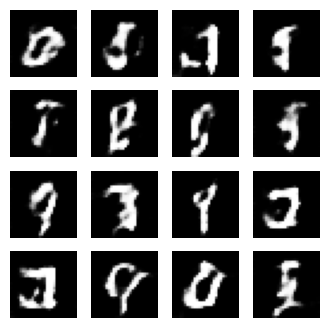

Epoch 24/100, Discriminator Loss: 0.9876554608345032, Generator Loss: 1.5033457279205322


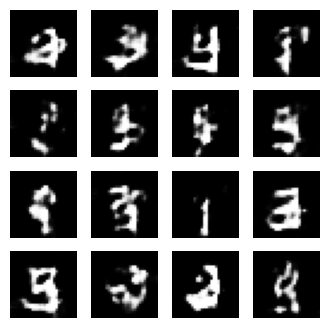

Epoch 27/100, Discriminator Loss: 1.1947553157806396, Generator Loss: 1.434403657913208


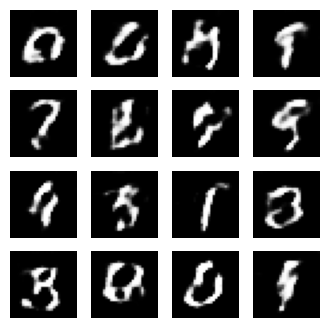

Epoch 30/100, Discriminator Loss: 1.2127814292907715, Generator Loss: 1.2711377143859863


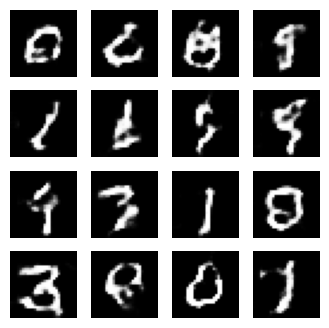

Epoch 33/100, Discriminator Loss: 1.1032979488372803, Generator Loss: 1.2536797523498535


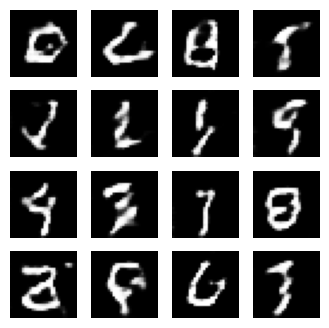

Epoch 36/100, Discriminator Loss: 1.2475976943969727, Generator Loss: 1.0383553504943848


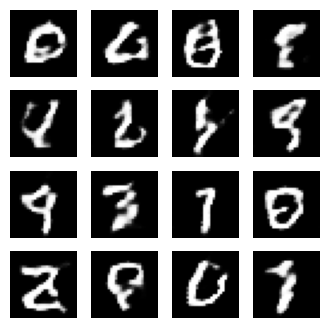

Epoch 39/100, Discriminator Loss: 1.3429076671600342, Generator Loss: 0.9951525926589966


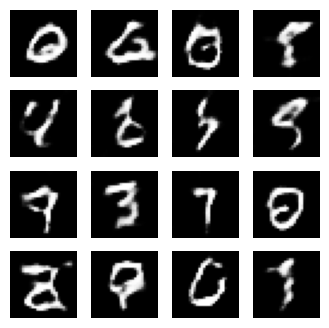

Epoch 42/100, Discriminator Loss: 1.259406566619873, Generator Loss: 0.947639524936676


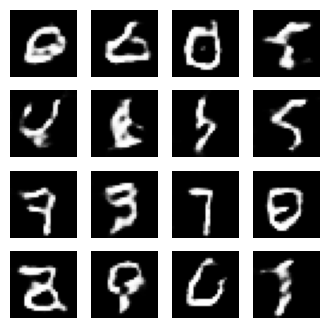

Epoch 45/100, Discriminator Loss: 1.1439673900604248, Generator Loss: 1.137752890586853


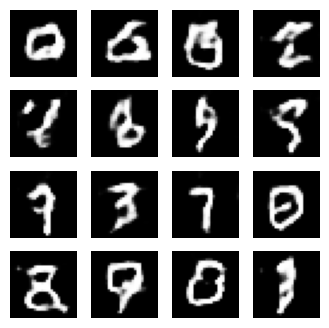

Epoch 48/100, Discriminator Loss: 1.1310335397720337, Generator Loss: 1.1348490715026855


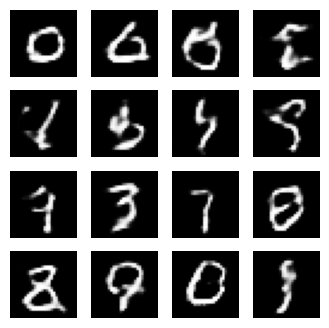

Epoch 51/100, Discriminator Loss: 1.1320910453796387, Generator Loss: 1.0896763801574707


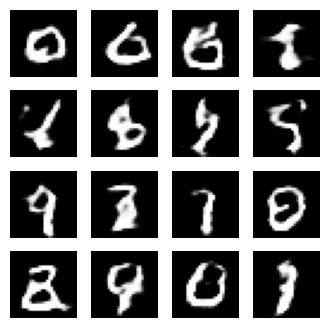

Epoch 54/100, Discriminator Loss: 1.2124106884002686, Generator Loss: 1.0183050632476807


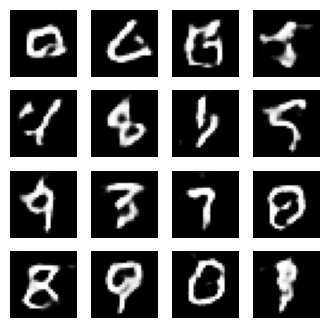

Epoch 57/100, Discriminator Loss: 1.3001887798309326, Generator Loss: 0.9736476540565491


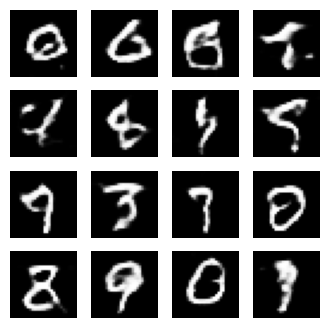

Epoch 60/100, Discriminator Loss: 1.126875638961792, Generator Loss: 1.1140714883804321


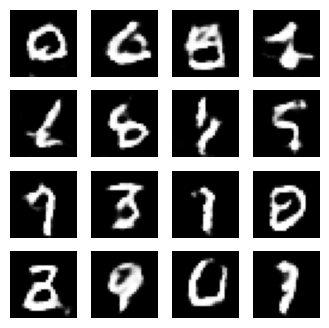

Epoch 63/100, Discriminator Loss: 1.2096331119537354, Generator Loss: 1.0438657999038696


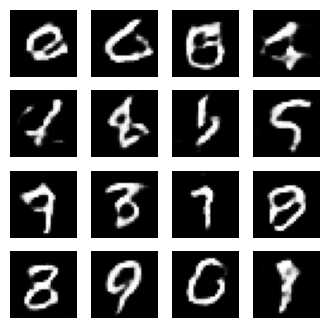

Epoch 66/100, Discriminator Loss: 1.2935888767242432, Generator Loss: 0.9936769008636475


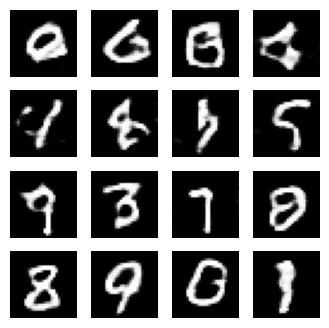

Epoch 69/100, Discriminator Loss: 1.1288268566131592, Generator Loss: 1.0631155967712402


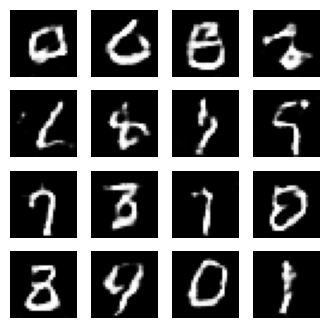

Epoch 72/100, Discriminator Loss: 1.2214136123657227, Generator Loss: 0.8857262134552002


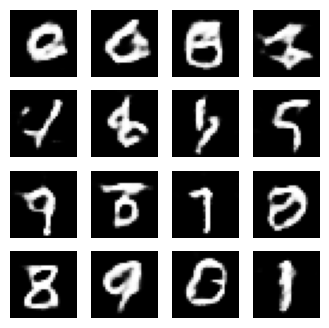

Epoch 75/100, Discriminator Loss: 1.1833224296569824, Generator Loss: 1.0505144596099854


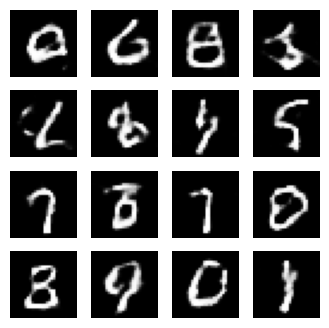

Epoch 78/100, Discriminator Loss: 1.3110013008117676, Generator Loss: 0.9506686329841614


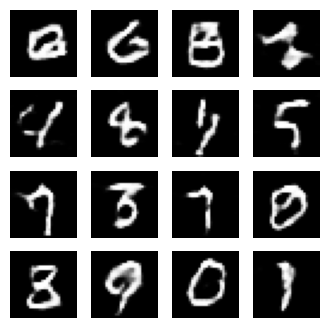

Epoch 81/100, Discriminator Loss: 1.1384656429290771, Generator Loss: 1.1341183185577393


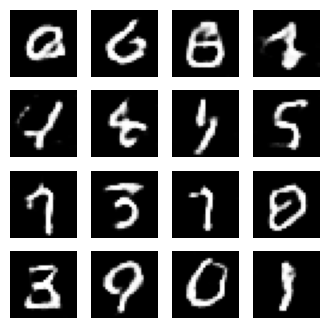

Epoch 84/100, Discriminator Loss: 1.3822240829467773, Generator Loss: 0.9963176846504211


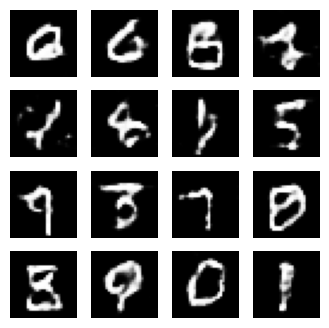

Epoch 87/100, Discriminator Loss: 1.1857142448425293, Generator Loss: 0.9839550256729126


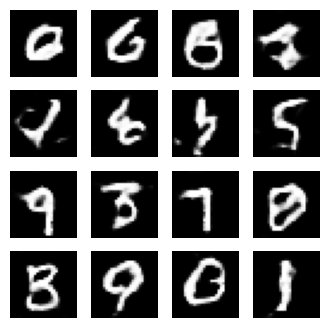

Epoch 90/100, Discriminator Loss: 1.4927469491958618, Generator Loss: 0.9281080365180969


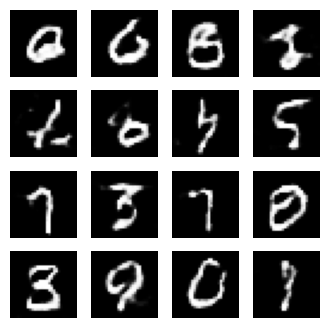

Epoch 93/100, Discriminator Loss: 1.3062574863433838, Generator Loss: 0.9649636149406433


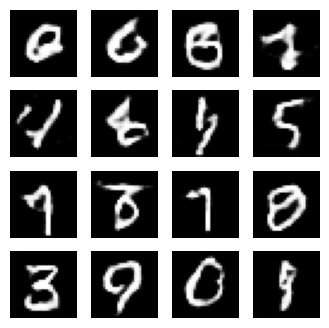

Epoch 96/100, Discriminator Loss: 1.239405632019043, Generator Loss: 1.048388957977295


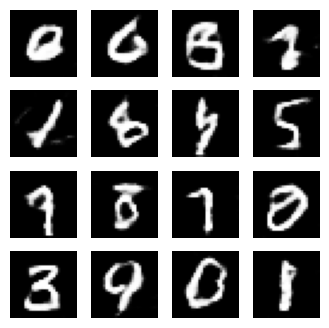

Epoch 99/100, Discriminator Loss: 1.2981467247009277, Generator Loss: 0.9827898144721985


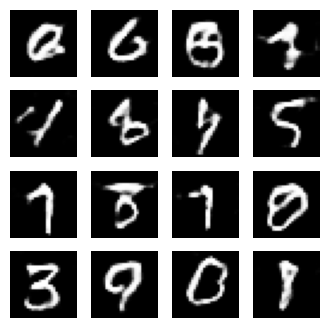

In [ ]:
# Training loop
num_epochs = 100
batch_size = 256
num_examples_to_generate = 16

random_vector_for_generation = tf.random.normal([num_examples_to_generate, 100])

for epoch in range(num_epochs):
  for i in range(train_images.shape[0] // batch_size):
      batch = train_images[i * batch_size: (i + 1) * batch_size]
      d_loss, g_loss = train_step(batch)

  if epoch % 3 == 0:
      print(f"Epoch {epoch}/{num_epochs}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")
      generate_and_save_images(generator, epoch + 1, random_vector_for_generation)
  print("==========================================================================================")



In [ ]:
# Save models
generator.save('generator_model.h5')
discriminator.save('discriminator_model.h5')

In [ ]:


# Load models
generator = tf.keras.models.load_model('generator_model.h5')
discriminator = tf.keras.models.load_model('discriminator_model.h5')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models

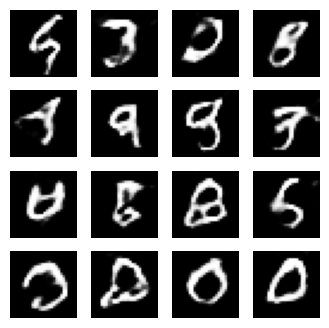

In [ ]:
# Load the saved models
generator = tf.keras.models.load_model('generator_model.h5')

# Generate new images
num_examples_to_generate = 16
random_vector_for_generation = tf.random.normal([num_examples_to_generate, 100])
generated_images = generator(random_vector_for_generation, training=False)

# Plot the generated images
plt.figure(figsize=(4, 4))
for i in range(generated_images.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
plt.show()

# Autoencoders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/50
235/235 [==============================] - 8s 31ms/step - loss: 0.2128 - val_loss: 0.1364
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1184 - val_loss: 0.1033
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0967 - val_loss: 0.0893
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0861 - val_loss: 0.0816
Epoch 5/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0799 - val_loss: 0.0770
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0762 - val_loss: 0.0742
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0738 - val_loss: 0.0723
Epoch 8/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0722 - val_loss: 0.0710
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0702 - val_lo

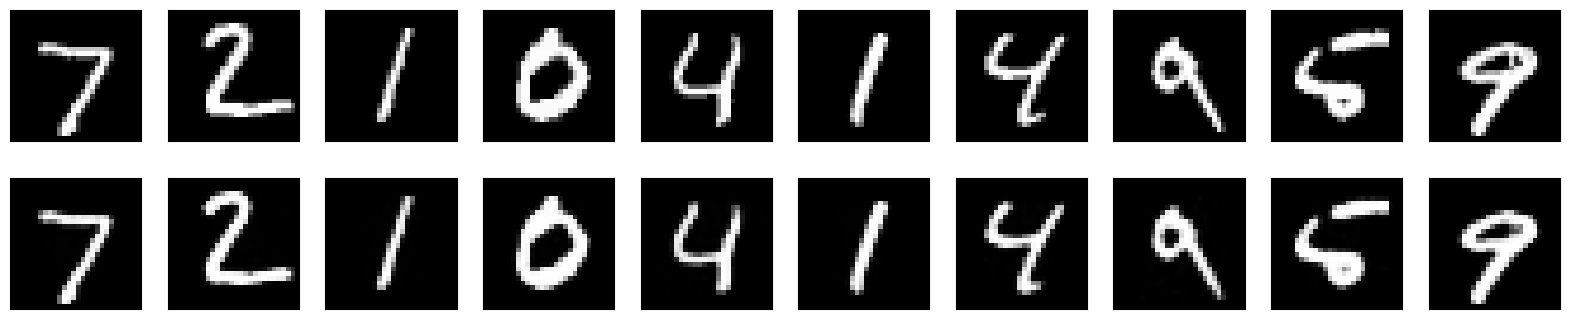

In [ ]:
# Plot the original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# VAE

In [ ]:
# https://www.tensorflow.org/tutorials/generative/cvae

# Another Model

In [ ]:
# example of training a gan on mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [ ]:
# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [ ]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()

In [ ]:
%%time
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

4/4 [==============================] - 0s 6ms/step
>1, 1/234, d=0.448, g=0.708
4/4 [==============================] - 0s 5ms/step
>1, 2/234, d=0.412, g=0.714
4/4 [==============================] - 0s 5ms/step
>1, 3/234, d=0.389, g=0.722
4/4 [==============================] - 0s 4ms/step
>1, 4/234, d=0.367, g=0.733
4/4 [==============================] - 0s 4ms/step
>1, 5/234, d=0.355, g=0.749
4/4 [==============================] - 0s 4ms/step
>1, 6/234, d=0.340, g=0.772
4/4 [==============================] - 0s 3ms/step
>1, 7/234, d=0.327, g=0.806
4/4 [==============================] - 0s 3ms/step
>1, 8/234, d=0.312, g=0.855
4/4 [==============================] - 0s 3ms/step
>1, 9/234, d=0.287, g=0.931
4/4 [==============================] - 0s 3ms/step
>1, 10/234, d=0.262, g=1.038
4/4 [==============================] - 0s 3ms/step
>1, 11/234, d=0.228, g=1.202
4/4 [==============================] - 0s 3ms/step
>1, 12/234, d=0.192, g=1.408
4/4 [==============================] - 0s 3ms/ste

4/4 [==============================] - 0s 5ms/step
>11, 1/234, d=0.690, g=0.728
4/4 [==============================] - 0s 4ms/step
>11, 2/234, d=0.690, g=0.706
4/4 [==============================] - 0s 4ms/step
>11, 3/234, d=0.689, g=0.633
4/4 [==============================] - 0s 5ms/step
>11, 4/234, d=0.687, g=0.711
4/4 [==============================] - 0s 4ms/step
>11, 5/234, d=0.683, g=0.788
4/4 [==============================] - 0s 4ms/step
>11, 6/234, d=0.690, g=0.738
4/4 [==============================] - 0s 4ms/step
>11, 7/234, d=0.686, g=0.698
4/4 [==============================] - 0s 4ms/step
>11, 8/234, d=0.688, g=0.682
4/4 [==============================] - 0s 3ms/step
>11, 9/234, d=0.687, g=0.664
4/4 [==============================] - 0s 3ms/step
>11, 10/234, d=0.698, g=0.714
4/4 [==============================] - 0s 4ms/step
>11, 11/234, d=0.693, g=0.715
4/4 [==============================] - 0s 3ms/step
>11, 12/234, d=0.699, g=0.726
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step
>21, 1/234, d=0.695, g=0.676
4/4 [==============================] - 0s 5ms/step
>21, 2/234, d=0.689, g=0.652
4/4 [==============================] - 0s 4ms/step
>21, 3/234, d=0.689, g=0.728
4/4 [==============================] - 0s 4ms/step
>21, 4/234, d=0.691, g=0.704
4/4 [==============================] - 0s 4ms/step
>21, 5/234, d=0.677, g=0.660
4/4 [==============================] - 0s 4ms/step
>21, 6/234, d=0.682, g=0.735
4/4 [==============================] - 0s 4ms/step
>21, 7/234, d=0.684, g=0.770
4/4 [==============================] - 0s 4ms/step
>21, 8/234, d=0.694, g=0.726
4/4 [==============================] - 0s 4ms/step
>21, 9/234, d=0.692, g=0.737
4/4 [==============================] - 0s 4ms/step
>21, 10/234, d=0.695, g=0.789
4/4 [==============================] - 0s 5ms/step
>21, 11/234, d=0.689, g=0.703
4/4 [==============================] - 0s 5ms/step
>21, 12/234, d=0.691, g=0.648
4/4 [==============================] 

4/4 [==============================] - 0s 6ms/step
>31, 1/234, d=0.690, g=0.735
4/4 [==============================] - 0s 6ms/step
>31, 2/234, d=0.689, g=0.727
4/4 [==============================] - 0s 4ms/step
>31, 3/234, d=0.700, g=0.619
4/4 [==============================] - 0s 4ms/step
>31, 4/234, d=0.694, g=0.685
4/4 [==============================] - 0s 4ms/step
>31, 5/234, d=0.683, g=0.780
4/4 [==============================] - 0s 4ms/step
>31, 6/234, d=0.688, g=0.690
4/4 [==============================] - 0s 4ms/step
>31, 7/234, d=0.695, g=0.715
4/4 [==============================] - 0s 4ms/step
>31, 8/234, d=0.672, g=0.784
4/4 [==============================] - 0s 4ms/step
>31, 9/234, d=0.684, g=0.777
4/4 [==============================] - 0s 4ms/step
>31, 10/234, d=0.687, g=0.673
4/4 [==============================] - 0s 4ms/step
>31, 11/234, d=0.687, g=0.789
4/4 [==============================] - 0s 4ms/step
>31, 12/234, d=0.689, g=0.675
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step
>41, 1/234, d=0.696, g=0.628
4/4 [==============================] - 0s 5ms/step
>41, 2/234, d=0.683, g=0.755
4/4 [==============================] - 0s 5ms/step
>41, 3/234, d=0.689, g=0.720
4/4 [==============================] - 0s 6ms/step
>41, 4/234, d=0.672, g=0.683
4/4 [==============================] - 0s 4ms/step
>41, 5/234, d=0.692, g=0.704
4/4 [==============================] - 0s 4ms/step
>41, 6/234, d=0.689, g=0.840
4/4 [==============================] - 0s 4ms/step
>41, 7/234, d=0.678, g=0.657
4/4 [==============================] - 0s 4ms/step
>41, 8/234, d=0.684, g=0.638
4/4 [==============================] - 0s 4ms/step
>41, 9/234, d=0.705, g=0.775
4/4 [==============================] - 0s 4ms/step
>41, 10/234, d=0.706, g=0.691
4/4 [==============================] - 0s 4ms/step
>41, 11/234, d=0.690, g=0.763
4/4 [==============================] - 0s 3ms/step
>41, 12/234, d=0.695, g=0.700
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step
>51, 1/234, d=0.691, g=0.750
4/4 [==============================] - 0s 5ms/step
>51, 2/234, d=0.697, g=0.689
4/4 [==============================] - 0s 5ms/step
>51, 3/234, d=0.717, g=0.731
4/4 [==============================] - 0s 4ms/step
>51, 4/234, d=0.691, g=0.743
4/4 [==============================] - 0s 4ms/step
>51, 5/234, d=0.693, g=0.727
4/4 [==============================] - 0s 4ms/step
>51, 6/234, d=0.694, g=0.651
4/4 [==============================] - 0s 6ms/step
>51, 7/234, d=0.699, g=0.725
4/4 [==============================] - 0s 7ms/step
>51, 8/234, d=0.686, g=0.736
4/4 [==============================] - 0s 6ms/step
>51, 9/234, d=0.697, g=0.702
4/4 [==============================] - 0s 7ms/step
>51, 10/234, d=0.686, g=0.725
4/4 [==============================] - 0s 6ms/step
>51, 11/234, d=0.691, g=0.715
4/4 [==============================] - 0s 4ms/step
>51, 12/234, d=0.699, g=0.700
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step
>61, 1/234, d=0.693, g=0.715
4/4 [==============================] - 0s 5ms/step
>61, 2/234, d=0.693, g=0.729
4/4 [==============================] - 0s 4ms/step
>61, 3/234, d=0.690, g=0.697
4/4 [==============================] - 0s 4ms/step
>61, 4/234, d=0.689, g=0.715
4/4 [==============================] - 0s 4ms/step
>61, 5/234, d=0.695, g=0.705
4/4 [==============================] - 0s 4ms/step
>61, 6/234, d=0.689, g=0.656
4/4 [==============================] - 0s 4ms/step
>61, 7/234, d=0.689, g=0.752
4/4 [==============================] - 0s 3ms/step
>61, 8/234, d=0.683, g=0.728
4/4 [==============================] - 0s 3ms/step
>61, 9/234, d=0.689, g=0.643
4/4 [==============================] - 0s 3ms/step
>61, 10/234, d=0.696, g=0.746
4/4 [==============================] - 0s 4ms/step
>61, 11/234, d=0.682, g=0.771
4/4 [==============================] - 0s 4ms/step
>61, 12/234, d=0.681, g=0.663
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step
>71, 1/234, d=0.685, g=0.735
4/4 [==============================] - 0s 5ms/step
>71, 2/234, d=0.688, g=0.711
4/4 [==============================] - 0s 5ms/step
>71, 3/234, d=0.686, g=0.693
4/4 [==============================] - 0s 4ms/step
>71, 4/234, d=0.691, g=0.735
4/4 [==============================] - 0s 4ms/step
>71, 5/234, d=0.680, g=0.712
4/4 [==============================] - 0s 4ms/step
>71, 6/234, d=0.694, g=0.722
4/4 [==============================] - 0s 4ms/step
>71, 7/234, d=0.704, g=0.734
4/4 [==============================] - 0s 4ms/step
>71, 8/234, d=0.697, g=0.728
4/4 [==============================] - 0s 4ms/step
>71, 9/234, d=0.693, g=0.714
4/4 [==============================] - 0s 4ms/step
>71, 10/234, d=0.687, g=0.660
4/4 [==============================] - 0s 4ms/step
>71, 11/234, d=0.701, g=0.730
4/4 [==============================] - 0s 4ms/step
>71, 12/234, d=0.697, g=0.695
4/4 [==============================] 

4/4 [==============================] - 0s 7ms/step
>81, 1/234, d=0.692, g=0.671
4/4 [==============================] - 0s 4ms/step
>81, 2/234, d=0.697, g=0.761
4/4 [==============================] - 0s 4ms/step
>81, 3/234, d=0.691, g=0.652
4/4 [==============================] - 0s 5ms/step
>81, 4/234, d=0.685, g=0.710
4/4 [==============================] - 0s 4ms/step
>81, 5/234, d=0.680, g=0.758
4/4 [==============================] - 0s 5ms/step
>81, 6/234, d=0.691, g=0.668
4/4 [==============================] - 0s 4ms/step
>81, 7/234, d=0.695, g=0.697
4/4 [==============================] - 0s 5ms/step
>81, 8/234, d=0.698, g=0.770
4/4 [==============================] - 0s 4ms/step
>81, 9/234, d=0.692, g=0.688
4/4 [==============================] - 0s 4ms/step
>81, 10/234, d=0.688, g=0.683
4/4 [==============================] - 0s 4ms/step
>81, 11/234, d=0.695, g=0.697
4/4 [==============================] - 0s 4ms/step
>81, 12/234, d=0.691, g=0.686
4/4 [==============================] 

4/4 [==============================] - 0s 5ms/step
>91, 1/234, d=0.699, g=0.698
4/4 [==============================] - 0s 5ms/step
>91, 2/234, d=0.686, g=0.700
4/4 [==============================] - 0s 4ms/step
>91, 3/234, d=0.678, g=0.698
4/4 [==============================] - 0s 4ms/step
>91, 4/234, d=0.698, g=0.763
4/4 [==============================] - 0s 4ms/step
>91, 5/234, d=0.691, g=0.689
4/4 [==============================] - 0s 4ms/step
>91, 6/234, d=0.696, g=0.658
4/4 [==============================] - 0s 4ms/step
>91, 7/234, d=0.696, g=0.726
4/4 [==============================] - 0s 4ms/step
>91, 8/234, d=0.685, g=0.715
4/4 [==============================] - 0s 4ms/step
>91, 9/234, d=0.690, g=0.678
4/4 [==============================] - 0s 5ms/step
>91, 10/234, d=0.687, g=0.669
4/4 [==============================] - 0s 4ms/step
>91, 11/234, d=0.693, g=0.736
4/4 [==============================] - 0s 4ms/step
>91, 12/234, d=0.695, g=0.714
4/4 [==============================] 

CPU times: user 1h 1min 10s, sys: 1min 33s, total: 1h 2min 44s
Wall time: 1h 13min 33s
